# Лабораторная работа 4
## Аппроксимации граничных условий второго рода в методе конечных разностей на примере уравнения теплопроводности.
### Вариант 13

### Задача 1
Найти приближенное решение начально-краевой задачи для уравнения теплопроводности:
$$\begin{cases} 
   \frac {\partial u}{\partial t}= k\frac {\partial ^2u}{\partial x^2} + f(x, t), \qquad\qquad\;\; a < x < b, \ 0 < t < T, \\
   u(a, t) = g1(t), \ \frac {\partial u}{\partial t}= g2(t), \qquad \; 0 < t < T,\\
   u(x, 0) = \varphi(x), \qquad \qquad \qquad \;\;\; a < x < b,.
\end{cases}$$ 

#### Явная схема

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau} \Rightarrow
$$

$$
 \Rightarrow \frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
$$


Пусть
$$
L = \frac{\partial}{\partial t} - \frac{\partial^2}{\partial x^2}
$$

Тогда:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2} \Rightarrow
$$

$$
\Rightarrow u(x, t + \tau) = u(x, t) + \tau(\frac{u(x + h, t)}{h^2} - 2 \frac{u(x, t)}{h^2} + \frac{u(x-h, t)}{h^2}) \Rightarrow
$$

$$
\Rightarrow u(x, t + \tau) = \frac{\tau}{h^2}u(x-h,t) + (1 - \frac{2\tau}{h^2})u(x,t) + \frac{\tau}{h^2}u(x+h, t)
$$ 

#### Неявная схема

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}
$$

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t + \tau) - 2u(x, t + \tau) + u(x-h, t + \tau)}{h^2}
$$

Тогда:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t+\tau) - 2u(x, t+\tau) + u(x-h, t+\tau)}{h^2} \Rightarrow
$$

$$
\Rightarrow u(x, t) = u(x, t + \tau) - \tau(\frac{u(x + h, t+\tau)}{h^2} + 2 \frac{u(x, t+\tau)}{h^2} - \frac{u(x-h, t+\tau)}{h^2}) \Rightarrow
$$

$$
\Rightarrow u(x, t) = -\frac{\tau}{h^2}u(x-h,t+\tau) + (1 + \frac{2\tau}{h^2})u(x,t+\tau) - \frac{\tau}{h^2}u(x+h, t+\tau)
$$

##### Метод 1 (Аппроксимация левой разностью)
Аппроксимируем:

$$
\frac{\partial T}{\partial x} = \frac{T_N^n - T_{n-1}^n}{h} \quad \Rightarrow 
\quad T_N^n = h\cdot g_2(t) + T_{N-1}^n
$$

##### Метод 2(Аппроксимация центральной разностью)

$$
\frac{\partial T}{\partial x} = \frac{T_{N+1}^n - T_{n-1}^n}{2h} \quad \Rightarrow 
\quad T_{N+1}^n = 2h\cdot g_2(t) + T_{N-1}^n
$$

In [2]:
import numpy as np
import matplotlib.pyplot as pl
from tabulate import tabulate

In [3]:
a = 0
b = 1
k = 0.2
T = 0.25
gNx = 50

gh = (b - a) / gNx
gx_list = np.linspace(a, b, gNx)
gtau = gh**2 / 2 / k
gNt = int(T / gtau + 1)
gt_list = np.linspace(0, T, gNt)

def phi(x):
    return 0#np.sin(x)

def g1(t):
    return 0

def g2(t):
    return np.sin(1 + 2*t)

def f(x, t):
    return 1 - x

In [4]:
def explicit(h = gh, tau = gtau, method = 1):
    Nx = int((b-a)/h)
    x_list = np.linspace(a, b, Nx)
    Nt = int(T / tau)
    t_list = np.linspace(0, T, Nt)

    m = np.zeros((Nt, Nx))
    m[:,0] = g1(t_list)
    m[0] = phi(x_list)
    multiplier = (k * tau / h**2, 1 - 2 * k * tau / h**2, k * tau / h**2)
    for i in range(1, Nt):
        for j in range(1, Nx - 1):
            m[i, j] = m[i-1, j-1:j+2].dot(multiplier) + tau * f(x_list[j], t_list[i-1])
        if method == 1:
            m[i, -1] = m[i, -2] + h*g2(t_list[i])
        else:
            m[i, -1] = k*tau / h**2 * m[i-1, -2] \
            + (1 - 2*k*tau / h**2) * m[i-1, -2] \
            + tau * f(b, t_list[i]) \
            + k*tau/h**2 * (2*h*g2(t_list[i])+m[i,-2])
    return m

def show_table(mutator, selector, scheme, method=1, tau = gtau, h = gh):
    Nt = int(T / tau)
    t_list = np.linspace(0, T, Nt)
    
    idx1 = np.random.randint(0, Nt-1)
    idx2 = np.random.randint(0, Nt-1)
    
    rt1 = t_list[idx1]
    rt2 = t_list[idx2]
    print("tn1=" + str(rt1))
    print("tn2=" + str(rt2))
    
    rows = np.zeros((5, 6))
    m2 = scheme(h, tau, method=method)
    
    for i in range(5):
        idx1 = int(rt1/tau)
        idx2 = int(rt2/tau)  
        h, tau = mutator(h, tau) 
        
        m1 = m2
        m2 = scheme(h, tau, method=method)
    
        dev1 = m1[idx1] - selector(m2, idx1)
        dev2 = m1[idx2] - selector(m2, idx2)
        
        rows[i] = int((b-a)/h), tau, dev1.std(), dev2.std(), max(dev1), max(dev2)
         
    print(tabulate(rows, ("Nx", "tau", "std1", "std2", "maxd1", "maxd2")))
    
def show_tables(scheme, method=1):
    print("fixed tau")
    show_table(lambda h, tau: (h/2, tau), lambda m, i: m[i][1::2]
               , scheme, method, 0.001, 0.05)
    print("fixed h")
    show_table(lambda h, tau: (h, tau/2), lambda m, i: m[2*i], scheme, method)

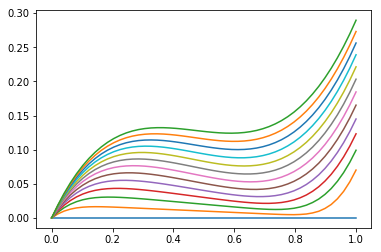

fixed tau
tn1=0.16767068273092367
tn2=0.22489959839357426
  Nx    tau         std1         std2        maxd1        maxd2
----  -----  -----------  -----------  -----------  -----------
   4  0.001  0.0908394    0.0830508    0.0818017    0.0360972
   8  0.001  0.0635818    0.0696932    0.10444      0.10648
  16  0.001  0.0258886    0.0293885    0.0449229    0.0477683
  32  0.001  0.0113668    0.0131483    0.0204547    0.0220031
  64  0.001  4.64971e+53  8.13402e+73  1.03928e+53  2.38832e+74
fixed h
tn1=0.09939759036144577
tn2=0.10140562248995982
  Nx        tau         std1         std2        maxd1        maxd2
----  ---------  -----------  -----------  -----------  -----------
  50  0.0005     0.000124303  0.00012358   6.02141e-05  6.00048e-05
  50  0.00025    6.19695e-05  6.16112e-05  2.98629e-05  2.98063e-05
  50  0.000125   3.09334e-05  3.07549e-05  1.49029e-05  1.4874e-05
  50  6.25e-05   1.54539e-05  1.53648e-05  7.4443e-06   7.4297e-06
  50  3.125e-05  7.72516e-06  7.68063e-06 

In [173]:
for line in explicit()[::20]:
    pl.plot(gx_list, line)
pl.show()
show_tables(explicit)

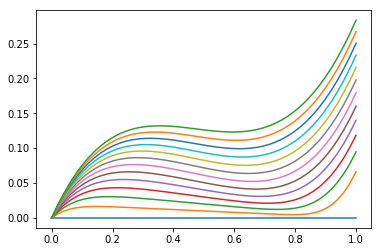

fixed tau
tn1=0.07831325301204818
tn2=0.24297188755020077
  Nx    tau         std1         std2         maxd1         maxd2
----  -----  -----------  -----------  ------------  ------------
   4  0.001  0.00754445   0.00594347   -0.0288948    -0.0927389
   8  0.001  0.0213401    0.0416869     0.00971583    0.0221843
  16  0.001  0.0100076    0.0172999     0.00213015    0.00153334
  32  0.001  0.0106445    0.0184494     0.00114622   -0.00275684
  64  0.001  2.81972e+22  3.97027e+80   8.86266e+22   1.12821e+81
fixed h
tn1=0.24497991967871482
tn2=0.2008032128514056
  Nx        tau        std1        std2      maxd1       maxd2
----  ---------  ----------  ----------  ---------  ----------
  50  0.0005     0.0331382   0.0290549   0.121047   0.108339
  50  0.00025    0.0166063   0.0145801   0.0606199  0.0543188
  50  0.000125   0.00837036  0.00735959  0.0305322  0.0273925
  50  6.25e-05   0.0042094   0.00370291  0.0153469  0.0137749
  50  3.125e-05  0.0021117   0.00185816  0.0076969  0.0069

In [174]:
for line in explicit(method=2)[::20]:
    pl.plot(gx_list, line)
pl.show()
show_tables(explicit, method=2)

In [5]:
def implicit(h = gh, tau = gtau, method = 1):
    Nx = int((b-a)/h)
    x_list = np.linspace(a, b, Nx)
    Nt = int(T / tau) + 1
    t_list = np.linspace(0, T, Nt)

    m = np.zeros((Nt, Nx))
    m[0] = phi(x_list)
    
    nNx = Nx + method - 1
    for i in range(1, Nt):
        mt = np.zeros((nNx, nNx))
        
        for j in range(1, nNx - 1):
            mt[j, j-1:j+2] = -k / h ** 2, 1 / tau + 2 * k / h ** 2, -k / h ** 2

        mt[0, 0] = mt[-1, -1] = 1
        mt[-1, -1 - method] = -1

        v = np.zeros(nNx)
        v[:Nx] = f(x_list, [t_list[i]]*Nx) + m[i - 1] / tau
        v[0] = g1(a)
        v[-1] = (method * h * g2(t_list[i]))
        m[i] = np.linalg.solve(mt, v)[:Nx]

    return m

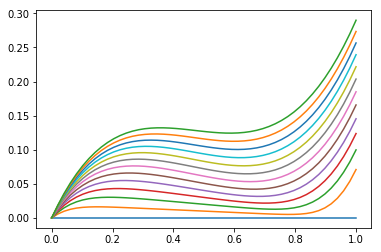

fixed tau
tn1=0.001004016064257028
tn2=0.19076305220883533
  Nx    tau         std1        std2        maxd1        maxd2
----  -----  -----------  ----------  -----------  -----------
  40  0.001  0.00411899   0.00943025  0.0188539    0.0165673
  80  0.001  0.00131029   0.00446058  0.0081517    0.0079739
 160  0.001  0.000431181  0.00216643  0.00346155   0.00391039
 320  0.001  0.000160402  0.00106722  0.0015333    0.00193618
 640  0.001  6.73509e-05  0.00052961  0.000713452  0.000963349
fixed h
tn1=0.1144578313253012
tn2=0.10341365461847389
  Nx        tau         std1         std2        maxd1        maxd2
----  ---------  -----------  -----------  -----------  -----------
  50  0.0005     3.32831e-05  3.46609e-05  4.2059e-05   4.48089e-05
  50  0.00025    1.66839e-05  1.73781e-05  2.10998e-05  2.24768e-05
  50  0.000125   8.34427e-06  8.69343e-06  1.05531e-05  1.12414e-05
  50  6.25e-05   4.17271e-06  4.34781e-06  5.2773e-06   5.62141e-06
  50  3.125e-05  2.0865e-06   2.17465e-06  

In [6]:
for line in implicit()[::20]:
    pl.plot(gx_list, line)
pl.show()
show_tables(implicit)

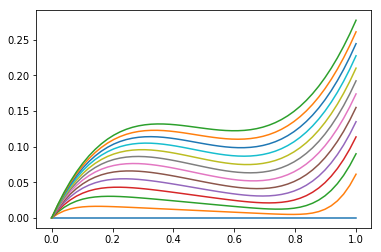

fixed tau
tn1=0.0572289156626506
tn2=0.0502008032128514
  Nx    tau         std1         std2        maxd1        maxd2
----  -----  -----------  -----------  -----------  -----------
  40  0.001  0.00314503   0.00290678   0.000782322  0.000705405
  80  0.001  0.00151037   0.00139097   0.000396448  0.000361123
 160  0.001  0.000737352  0.000677725  0.00019996   0.000181788
 320  0.001  0.000363925  0.000334142  0.000100283  9.12176e-05
 640  0.001  0.000180738  0.000165856  5.02185e-05  4.56733e-05
fixed h
tn1=0.05120481927710843
tn2=0.071285140562249
  Nx        tau         std1         std2        maxd1        maxd2
----  ---------  -----------  -----------  -----------  -----------
  50  0.0005     3.97876e-05  3.77704e-05  5.8497e-05   5.20957e-05
  50  0.00025    1.99727e-05  1.8946e-05   2.94664e-05  2.6179e-05
  50  0.000125   1.00062e-05  9.48295e-06  1.47876e-05  1.31095e-05
  50  6.25e-05   5.0059e-06   4.74529e-06  7.40172e-06  6.56285e-06
  50  3.125e-05  2.50365e-06  2.373

In [7]:
for line in implicit(method=2)[::20]:
    pl.plot(gx_list, line)
pl.show()
show_tables(implicit, method=2)